In [1]:
import csv
import json
import matplotlib.pyplot as plt  
import numpy as np


%matplotlib widget

In [2]:
'''Extracting useful data form json file'''

import json

filename = "IMG_0115.LFP__lfp_meta.json"

# Load metadata json file
with open('../data_extracted/IMG_0115/' + filename, 'r') as f:
    data = json.load(f)

# Extract depth map data
depthMap = data["views"][0]["accelerations"][0]["depthMap"]

width, height = depthMap["width"], depthMap["height"]
imgReg = depthMap["imageRef"]
minLambda, maxLambda = depthMap["minLambda"], depthMap["maxLambda"]

cam_var = data["frames"][0]["frame"]["metadata"]["devices"]["lens"]
focal_len, lambda_inf = cam_var["focalLength"], cam_var["infinityLambda"]


# "depthMap" : {
#     "width" : 271,
#     "height" : 188,
#     "imageRef" : "sha1-1e21bd1fd7ca64a915cf2579359ad5509aa3d6ec",
#     "representation" : "packedFloat",
#     "minLambda" : -11.184360504150390625,
#     "maxLambda" : 9.921878814697265625
# }

In [3]:
print(focal_len, lambda_inf)

0.0094580946441872 7.754311939709031


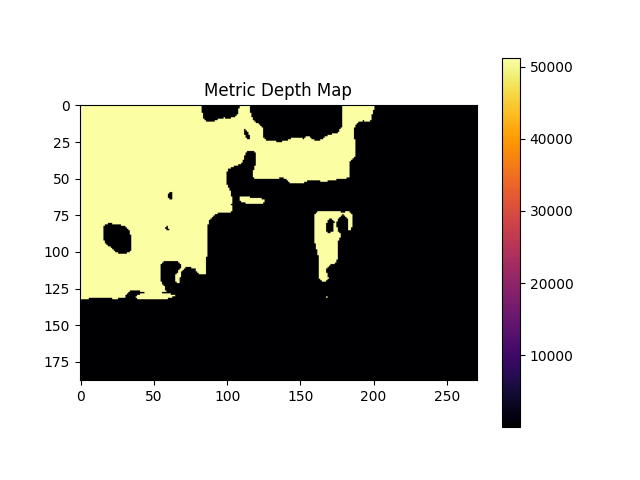

In [4]:
# focal_len = 0.0094580946441872003339
# lambda_inf = 7.7543119397090309874

# Load binary floats
depth = np.fromfile(
    "../data_extracted/IMG_0115/IMG_0115.LFP__b5c325cb21e69e7caf289a956b61ccd8620519eb.data",
    # "../data_extracted/IMG_0116/IMG_0116.LFP__1e21bd1fd7ca64a915cf2579359ad5509aa3d6ec.data",
    dtype=np.float32
).reshape((height, width))

# # Normalize for viewing
# depth_norm = (depth - minLambda) / (maxLambda - minLambda)

# normalizing_const = 0.1524/depth[100, 211]
# print(f"UNNORMALIZED DEPTH IS: {depth[100, 211]}")
# depth_real = (float(focal_len) * depth * normalizing_const) / (depth - lambda_inf)
# z = depth[100, 211]
# depth_real = (focal_len * (depth * (0.1524/z))) / (depth- lambda_inf)

depth_real = (focal_len * lambda_inf) / (lambda_inf - depth)

# depth_real_id = depth_real < 10000
# print(depth_real_id)
# depth_real_id.reshape((height, width))
# depth_real = depth_real_id * depth_real


# z = depth_real[100, 211]
# print(z*39.37)

# plt.figure()
# plt.imshow(depth)
# plt.show()
plt.figure()
plt.imshow(depth_real, cmap="inferno")
plt.title("Metric Depth Map")
plt.colorbar()
plt.show()

In [5]:
print(depth_real)

[[5.1269090e+04 5.1269090e+04 5.1269090e+04 ... 4.9535941e-02
  4.9535941e-02 4.1279957e-02]
 [5.1269090e+04 5.1269090e+04 5.1269090e+04 ... 5.5039927e-02
  6.1919913e-02 4.9535941e-02]
 [5.1269090e+04 5.1269090e+04 5.1269090e+04 ... 7.0765600e-02
  7.0765600e-02 4.9535941e-02]
 ...
 [4.6295281e-03 4.6295281e-03 4.6295281e-03 ... 4.3452592e-03
  4.3452592e-03 4.3452592e-03]
 [4.6295281e-03 4.6295281e-03 4.6295281e-03 ... 4.3452592e-03
  4.3452592e-03 4.3452592e-03]
 [4.5866626e-03 4.5866626e-03 4.5866626e-03 ... 4.3452592e-03
  4.3452592e-03 4.3452592e-03]]


In [6]:
depths = []
x = []
y = []

for i, depth_w in enumerate(depth_real):
    for j, depth2 in enumerate(depth_w):
        x.append(i)
        y.append(j)
        depths.append(depth2)



/tmp/ipykernel_63259/844226198.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


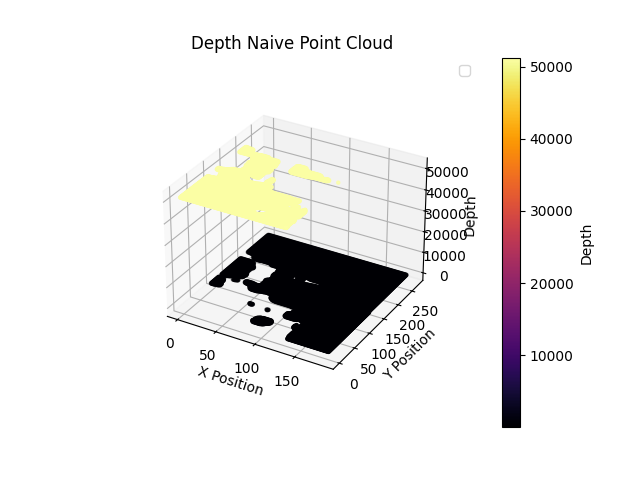

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

start = 0
end = 50000

sc = ax.scatter(x[start:end], y[start:end], 
           depths[start:end], c=depths[start:end], cmap='inferno', # color
           marker='.')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Depth')
ax.set_title('Depth Naive Point Cloud')
ax.legend()

# Color bar visualization
fig.colorbar(sc, ax=ax, label="Depth")

ax.set_box_aspect(None, zoom=0.80)
plt.show()

In [8]:
# # 3d array index
# print(depth_norm[60][207])
# # flat list index
x = 127
y = 290
print(depths[x*271 + y])

51269.09
